#Importing shit and Data Cleaning


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as dt
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import accuracy_score
 

In [0]:
data= dt.load_breast_cancer()

In [0]:
x= data.data
y=data.target

In [4]:
x

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [5]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [0]:
# now we make a dataframe
bc= pd.DataFrame(data.data, columns=data.feature_names)


In [0]:
bc['class']=data.target

In [8]:
bc.head

<bound method NDFrame.head of      mean radius  mean texture  ...  worst fractal dimension  class
0          17.99         10.38  ...                  0.11890      0
1          20.57         17.77  ...                  0.08902      0
2          19.69         21.25  ...                  0.08758      0
3          11.42         20.38  ...                  0.17300      0
4          20.29         14.34  ...                  0.07678      0
..           ...           ...  ...                      ...    ...
564        21.56         22.39  ...                  0.07115      0
565        20.13         28.25  ...                  0.06637      0
566        16.60         28.08  ...                  0.07820      0
567        20.60         29.33  ...                  0.12400      0
568         7.76         24.54  ...                  0.07039      1

[569 rows x 31 columns]>

# Splitting Data

In [0]:
x=bc.drop('class', axis=1)
y=bc['class']
x_train,x_test,y_train,y_test=tts(x,y,stratify=y, test_size=0.1, random_state=1)

In [10]:
print(y_train.shape)
print(y_train)

(512,)
430    0
48     1
105    0
467    1
547    1
      ..
201    0
183    1
285    1
49     1
161    0
Name: class, Length: 512, dtype: int64


#Binarization

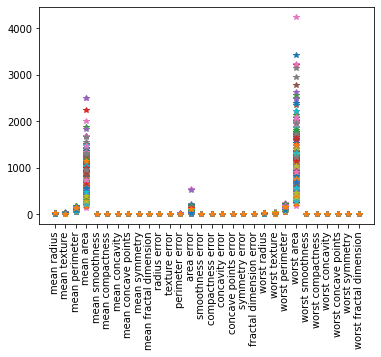

(512, 30)


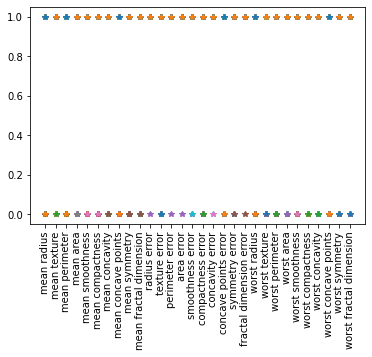

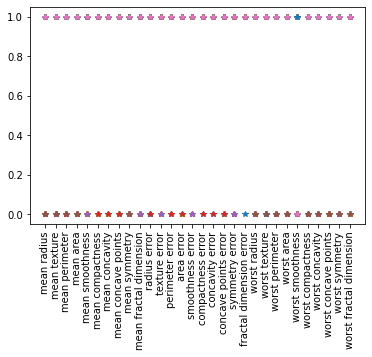

In [11]:
plt.plot(x_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()
print(x_train.shape)
x_btrain=x_train.apply(pd.cut, bins=2, labels=[1,0])
x_btest=x_test.apply(pd.cut, bins=2, labels=[1,0])
plt.plot(x_btrain.T, '*')
plt.xticks(rotation='vertical')
plt.show()
plt.plot(x_btest.T, '*')
plt.xticks(rotation='vertical')
plt.show()

# MP Neuron Model

In [0]:
class MPNeuron:
  def __init__(self):
    self.b=None
  def model(self, x):
    return (sum(x) >= self.b)
  def predict(self, X):
    y_p=[]
    for x in X:
      y_p.append(self.model(x))
    return np.array(y_p)
  def fit(self, X, Y):
    accuracy=[]
    max_acc=0
    for j in range(x_btrain.shape[1]+1):
      self.b=j
      y_p=self.predict(X)
      current_acc=accuracy_score(y_p, Y)
      accuracy.append(current_acc)
      if(current_acc>max_acc):
        max_acc=current_acc
        max_b=j
    self.b=max_b
    print(accuracy)
    print(max_acc, self.b)

In [0]:
x_btrain=x_btrain.values
x_btest=x_btest.values


In [14]:
mpneu=MPNeuron()
mpneu.fit(x_btrain,y_train)

[0.626953125, 0.626953125, 0.626953125, 0.626953125, 0.626953125, 0.626953125, 0.626953125, 0.626953125, 0.626953125, 0.626953125, 0.626953125, 0.626953125, 0.626953125, 0.626953125, 0.630859375, 0.6328125, 0.642578125, 0.6484375, 0.65625, 0.6640625, 0.671875, 0.6875, 0.701171875, 0.724609375, 0.755859375, 0.78515625, 0.818359375, 0.845703125, 0.849609375, 0.814453125, 0.759765625]
0.849609375 28


In [0]:
y_pred=mpneu.predict(x_btest)

In [16]:
print(accuracy_score(y_pred, y_test))

0.7894736842105263


# PERCEPTRON

In [0]:
class Perceptron:
  def __init__(self):
    self.b=None
    self.w=None
  def model(self, x):
    return (np.dot(self.w,x)>=self.b)
  def predict(self, X):
    y_p=[]
    for x in X:
      y_p.append(self.model(x))
    return np.array(y_p)
  def fit(self, X, Y, epochs=1, lr=1):
    self.b=0
    self.w=np.ones(X.shape[1])
    chkb=0
    chkw=np.ones(X.shape[1])
    max_acc=0
    accuracy=[]
    for i in range(epochs):
      for x,y in zip(X,Y):
        y_pred=self.model(x)
        if((y_pred==1) and (y==0)):
          self.w=self.w- lr*x
          self.b=self.b- lr*1
        if((y_pred==0) and (y==1)):
          self.w=self.w + lr*x
          self.b=self.b + lr*1
      current_acc=accuracy_score(self.predict(X), Y)
      accuracy.append(current_acc)
      if(current_acc>max_acc):
        max_acc=current_acc
        chkb=self.b
        chkw=self.w
    self.w=chkw
    self.b=chkb
    plt.plot(accuracy)
    plt.show()
    print(max_acc, self.b, self.w, accuracy)

In [0]:
x_train=x_train.values
x_test=x_test.values


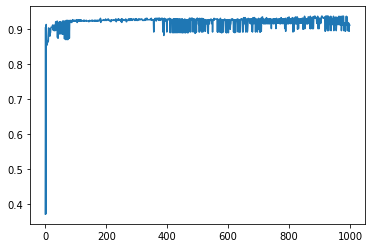

0.935546875 25.550000000001194 [ 1.73178440e+02  1.61051000e+01  5.32112700e+02  2.51520000e+01
 -4.33963500e-01 -1.46891521e+01 -2.14171946e+01 -7.80914005e+00
 -2.15212000e+00  7.49810100e-01  4.67544600e+00  5.25189000e-01
 -4.33358710e+01 -1.40784610e+02  5.76163590e-01 -4.03876511e+00
 -5.56980378e+00 -4.74857820e-01 -1.84478820e-01  5.26763382e-01
  1.81394800e+02 -1.85952300e+02  2.51351000e+01 -7.93050000e+01
 -3.18782860e+00 -5.46407612e+01 -6.45878080e+01 -1.74021939e+01
 -1.17110280e+01 -3.43138290e+00] [0.373046875, 0.904296875, 0.373046875, 0.912109375, 0.8828125, 0.857421875, 0.853515625, 0.86328125, 0.861328125, 0.865234375, 0.865234375, 0.90234375, 0.896484375, 0.89453125, 0.900390625, 0.87890625, 0.88671875, 0.888671875, 0.8984375, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.904296875, 0.91015625, 0.896484375, 0.91015625, 0.8984375, 0.8984375, 0.89453125, 0.91015625, 0.8984375, 0.89453125, 0.900390625, 0.919921875, 0.919921875, 0.91796875, 0.91796875, 0.89648

In [19]:
perc=Perceptron()
perc.fit(x_train,y_train,1000,0.01)
